# Projet spécialité Data-IA

# Analyse de données : l'industrie automobile et les changements climatiques

In [93]:
print("hello")

hello


Scrapper les données mondiales des ventes/émissions de CO2 des véhicules terrestre motorisés dans le monde, puis par continent, puis par pays de l'Europe, et pour une personne

# Scrapping des données mondiales

In [94]:
import requests # requêter sur le site
from bs4 import BeautifulSoup # parcourir le HTML
import pandas as pd # formatter les données/exporter en CSV

## Les ventes de véhicules, par années/pays/continent de 1999 à 2022

Nous avons trouvé le site de OICA. Une rubrique répertorie la production de véhicules motorisés dans le monde depuis 1999.

L'idée est donc de scraper ces données, dans la catégorie <b>production-statistics/{ANNÉE}-statistics</b>

Nous travaillerons depuis 2000.

Problématique : le site sur lequel nous sommes tombés permet de récupérer les données en scrappant, ou en téléchargeant le format CSV. Les CSV permettent de connaitre les continents.
Mais la mise en page change souvent.

Pour les continents, un module Python existe, AWOC

# AWOC (test)

In [95]:
# Import the AWOC package.
import awoc

# Initialize the AWOC class.
my_world = awoc.AWOC()

# Let's retrieve the full list of nations of Europe.
countries_of_europe = my_world.get_countries_list_of('Europe')
print(countries_of_europe)
# It returns: [ 'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', and so on... ]

# We can get the whole country data as well.
italy_data = my_world.get_country_data('Italy')

print(my_world.get_continents())

['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Faroe Islands', 'Finland', 'France', 'Germany', 'Gibraltar', 'Greece', 'Guernsey', 'Hungary', 'Iceland', 'Ireland', 'Isle of Man', 'Italy', 'Jersey', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macedonia', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Svalbard and Jan Mayen', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican']
[{'Continent Code': 'af', 'Continent Name': 'Africa'}, {'Continent Code': 'an', 'Continent Name': 'Antarctica'}, {'Continent Code': 'as', 'Continent Name': 'Asia'}, {'Continent Code': 'eu', 'Continent Name': 'Europe'}, {'Continent Code': 'na', 'Continent Name': 'North America'}, {'Continent Code': 'oc', 'Continent Name': 'Oceania'}, {'Continent Code': 'sa

# PYCountry_Convert

Test avec ce module

In [96]:
import pycountry_convert as pc

def get_continent(country_alpha2):
    try:
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except ValueError:
        return None

# Exemple d'utilisation
country_alpha2 = "US"  # Code ISO 3166-1 alpha-2 des États-Unis
continent = get_continent(country_alpha2)

if continent:
    print(f"Le continent de {country_alpha2} est {continent}.")
else:
    print(f"Impossible de déterminer le continent pour {country_alpha2}.")


Le continent de US est North America.


In [97]:
# CTRL + '/' pour commenter plusieurs lignes à la fois

import datetime

def get_current_year() -> int: 
    """ 
    for automatisation of the dataset. In 2025, 
    the program will research for the 2025's web page
    """
    today = datetime.date.today()
    year = today.year
    print(year)

    return year

def convert_to_csv(world_production_list: list):
    """
    convert the world production list to a csv file
    """
    df = pd.DataFrame(world_production_list)
    print(df.head(10))
    # df.insert(0, 'ID', range(1, len(quote_list) +1))
    df.to_csv(f'word_car_production_{begin_year}_{end_year}.csv', index=False, sep=';')

def scrape_page(soup: BeautifulSoup, world_production_list: list, start, end):
    """
    scrap page of the website
    """
    table = soup.find("tbody")
    countries = table.find_all("tr")

    # print(countries)

    for country_tr in countries:
        country_name = country_tr.find("td", {"class": f"column-1"}).text
        nbr_cars = country_tr.find("td", {"class": f"column-2"}).text
        nbr_commercial_vehicle = country_tr.find("td", {"class": f"column-3"}).text
        total = country_tr.find("td", {"class": f"column-4"}).text
        percent_change = country_tr.find("td", {"class": f"column-5"}).text

        # print(country_tr)
        # print(country_name)

        dict = {
            'Year': '',
            'Country_Name': '',
            'Nbr_Cars': '',
            'Nbr_Commercial_Vehicle': '',
            'Total': '',
            'Percent_Change': ''
        }

        dict['Year'] = start
        dict["Country_Name"] = country_name
        dict["Nbr_Cars"] = nbr_cars
        dict["Nbr_Commercial_Vehicle"] = nbr_commercial_vehicle
        dict["Total"] = total
        dict["Percent_Change"] = percent_change

        world_production_list.append(dict)

    start += 1

    if start < end_year:
        print('Accès à la page suivante')
        next_url = f'{target}{start}-statistics'
        print(f"Next URL : {next_url}")
        req = requests.get(target +  next_url)
        next_soup = BeautifulSoup(req.text, "html.parser")
        scrape_page(next_soup, world_production_list, start, end)

    return 

# begin_year = 2015
begin_year = 2000
end_year = get_current_year() - 1

target = f'https://www.oica.net/category/production-statistics/'
# https://www.oica.net/category/production-statistics/2015-statistics/
req = requests.get(target + f'{begin_year}-statistics')

if req.status_code != 200:
    print("Erreur")
    exit(0)
else:
    print(f"Accès au site {target}, status = {req.status_code}")

soup = BeautifulSoup(req.text, "html.parser")

if __name__ == "__main__":
    print(f"Date de début {begin_year}; Date de fin : {end_year}")

    world_production_list = []
    # print(world_production_list)
    scrape_page(soup, world_production_list, begin_year, end_year)
    print(world_production_list)
    convert_to_csv(world_production_list)


2024


Accès au site https://www.oica.net/category/production-statistics/, status = 200
Date de début 2000; Date de fin : 2023
Accès à la page suivante
Next URL : https://www.oica.net/category/production-statistics/2001-statistics
Accès à la page suivante
Next URL : https://www.oica.net/category/production-statistics/2002-statistics
Accès à la page suivante
Next URL : https://www.oica.net/category/production-statistics/2003-statistics
Accès à la page suivante
Next URL : https://www.oica.net/category/production-statistics/2004-statistics
Accès à la page suivante
Next URL : https://www.oica.net/category/production-statistics/2005-statistics
Accès à la page suivante
Next URL : https://www.oica.net/category/production-statistics/2006-statistics
Accès à la page suivante
Next URL : https://www.oica.net/category/production-statistics/2007-statistics
Accès à la page suivante
Next URL : https://www.oica.net/category/production-statistics/2008-statistics
Accès à la page suivante
Next URL : https://www.

# Amélioration du dataset

Afin d'afficher les données via une carte du monde, nous avons le nom des pays, mais aimerions également avoir les continents.

## Rajout des continents

Afin de réaliser notre storytelling, nous souhaitons faire une étude par pays, mais également pas continent et dans le monde. Il faut alors ajouter une colonne continent pour nos données

In [98]:
import pandas as pd
import pycountry_convert as pc

In [99]:
df = pd.read_csv(f"./word_car_production_{begin_year}_{end_year}.csv", delimiter=";")

df.head()

,Year,Country_Name,Nbr_Cars,Nbr_Commercial_Vehicle,Total,Percent_Change
0,2000,Argentina,"238,921","100,711","339,632",11.4%
1,2000,Australia,"323,649","23,473","347,122",14.6%
2,2000,Austria,"115,979","25,047","141,026",1.2%
3,2000,Belgium,"912,233","121,061","1,033,294",1.6%
4,2000,Brazil,"1,351,998","329,519","1,681,517",24.5%


In [100]:
df.columns

Index(['Year', 'Country_Name', 'Nbr_Cars', 'Nbr_Commercial_Vehicle', 'Total',
       'Percent_Change'],
      dtype='object')

### Corriger les erreurs de noms de pays

Certains pays posent problème car il ne sont pas formatés correctement pour pycountry_convert. Nous remplaçons alors leur nom par un format adéquat.

In [101]:
# Correct format for Czech Republic
df['Country_Name'] = df['Country_Name'].replace('Czech Rep.', 'Czech Republic')

# Format correct for United Kingdom
df['Country_Name'] = df['Country_Name'].replace('UK', 'United Kingdom')

In [102]:
df.head(10)

,Year,Country_Name,Nbr_Cars,Nbr_Commercial_Vehicle,Total,Percent_Change
0,2000,Argentina,"238,921","100,711","339,632",11.4%
1,2000,Australia,"323,649","23,473","347,122",14.6%
2,2000,Austria,"115,979","25,047","141,026",1.2%
3,2000,Belgium,"912,233","121,061","1,033,294",1.6%
4,2000,Brazil,"1,351,998","329,519","1,681,517",24.5%
5,2000,Canada,"1,550,500","1,411,136","2,961,636",-3.2%
6,2000,China,"604,677","1,464,392","2,069,069",13.1%
7,2000,Czech Republic,"428,224","27,268","455,492",21.1%
8,2000,Egypt,"39,616","20,149","59,765",-21.4%
9,2000,Finland,"38,468",458,"38,926",13.2%


In [103]:
def get_continent_code(row):
    """
    get the continent code for a dataframe's row
    """
    try:
        if row.Country_Name.lower() == 'total':
            return 'Entire World'
        
        if row.Country_Name.lower() == 'others':
            return 'Other'
            
        country_alpha2 = pc.country_name_to_country_alpha2(row.Country_Name.title() if row.Country_Name != 'USA' else row.Country_Name, cn_name_format="default")
        # print(row.Country_Name)
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        
        return continent_name
    
    except (ValueError, KeyError, TypeError) as e:
        print(f"Erreur lors de la conversion pour {row.Country_Name}: {e}")
        return None

In [104]:
df['Continent'] = df.apply(get_continent_code, axis=1)

Erreur lors de la conversion pour Supplementary: "Invalid Country Name: 'Supplementary'"


In [105]:
df.head(41)

,Year,Country_Name,Nbr_Cars,Nbr_Commercial_Vehicle,Total,Percent_Change,Continent
0,2000,Argentina,"238,921","100,711","339,632",11.4%,South America
1,2000,Australia,"323,649","23,473","347,122",14.6%,Oceania
2,2000,Austria,"115,979","25,047","141,026",1.2%,Europe
3,2000,Belgium,"912,233","121,061","1,033,294",1.6%,Europe
4,2000,Brazil,"1,351,998","329,519","1,681,517",24.5%,South America
5,2000,Canada,"1,550,500","1,411,136","2,961,636",-3.2%,North America
6,2000,China,"604,677","1,464,392","2,069,069",13.1%,Asia
7,2000,Czech Republic,"428,224","27,268","455,492",21.1%,Europe
8,2000,Egypt,"39,616","20,149","59,765",-21.4%,Africa
9,2000,Finland,"38,468",458,"38,926",13.2%,Europe


In [106]:
select_country = df.loc[df['Country_Name'] == 'France']
print(select_country)

     Year Country_Name   Nbr_Cars Nbr_Commercial_Vehicle      Total  \
10   2000       France  2,879,810                468,551  3,348,361   
50   2001       France  3,181,549                446,869  3,628,418   
90   2002       France  3,292,797                309,073  3,601,870   
130  2003       France  3,220,329                399,737  3,620,066   
170  2004       France  3,227,416                438,574  3,665,990   
210  2005       France  3,112,961                436,047  3,549,008   
250  2006       France  2,723,196                446,023  3,169,219   
290  2007       France  2,550,869                464,985  3,015,854   
330  2008       France  2,145,935                423,043  2,568,978   
370  2009       France  1,819,497                228,196  2,047,693   
410  2010       France  1,924,171                305,250  2,229,421   
450  2011       France  1,931,030                311,898  2,242,928   
490  2012       France  1,682,814                284,951  1,967,765   
530  2

In [107]:
df.dtypes

Year                       int64
Country_Name              object
Nbr_Cars                  object
Nbr_Commercial_Vehicle    object
Total                     object
Percent_Change            object
Continent                 object
dtype: object

Convertir la colonne <b>Year</b> en datetime

In [108]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [109]:
df.dtypes

Year                      datetime64[ns]
Country_Name                      object
Nbr_Cars                          object
Nbr_Commercial_Vehicle            object
Total                             object
Percent_Change                    object
Continent                         object
dtype: object

In [110]:
years = df['Year'].unique()

for i in range(len(years)):
    select_top_country_by_year = df.groupby(df['Year'].dt.year)['Total'].max().reset_index()

print(select_top_country_by_year)

    Year      Total
0   2000    801,360
1   2001  9,777,191
2   2002    894,796
3   2003     95,247
4   2004    927,981
5   2005     95,814
6   2006    987,780
7   2007    997,240
8   2008    952,840
9   2009    999,378
10  2010     94,132
11  2011    838,388
12  2012    926,555
13  2013    975,000
14  2014    971,160
15  2015    982,337
16  2016    920,162
17  2017      99880
18  2018    9728528
19  2019    9684298
20  2020     987044
21  2021      95797
22  2022     876614


## Enlever les virgules des entiers

Nous décidons d'enlever les virgules pour le moment, pour pouvoir mettre ces valeurs en tant qu'entiers sur les applications que nous utiliserons ou non, comme PowerBI, qui n'accepte pas les entiers qui sont de la forme 2,555,555. Nous allons les mettre de la forme 2555555 et tester également de la forme 2.555.555.

In [111]:
dot_to_delete_cols = ['Nbr_Cars', 'Nbr_Commercial_Vehicle',	'Total']

for col in dot_to_delete_cols:
    df[col] = df[col].replace(',', '', regex=True)

In [112]:
df['Country_Name'] = df['Country_Name'].str.capitalize()

In [113]:
df.to_csv(f'test.csv', index=False, sep=';')

In [114]:
df.head()

,Year,Country_Name,Nbr_Cars,Nbr_Commercial_Vehicle,Total,Percent_Change,Continent
0,2000-01-01,Argentina,238921,100711,339632,11.4%,South America
1,2000-01-01,Australia,323649,23473,347122,14.6%,Oceania
2,2000-01-01,Austria,115979,25047,141026,1.2%,Europe
3,2000-01-01,Belgium,912233,121061,1033294,1.6%,Europe
4,2000-01-01,Brazil,1351998,329519,1681517,24.5%,South America


### Enlever les lignes "total"

Enlever les lignes totales pour qu'elles ne soient pas prises en comptes lors des visuels (exmeple: USA = 5000; France = 4000; Total = 9000).

Lors des visuels, la valeur va prende 18000, car elle va aussi compter le total.

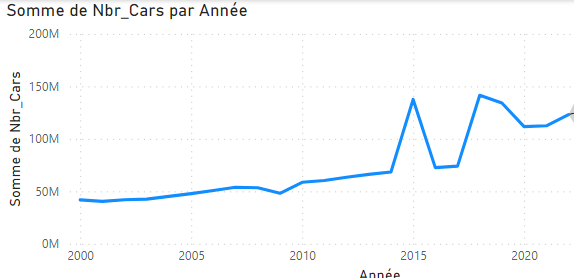

A partir de 2015, des lignes permettant de voir le Total apparaissent, et faussent donc les données.

In [120]:
total_rows = df.loc[df['Country_Name'] == 'Total']
print(total_rows)

df = df.drop(index=df.loc[df['Country_Name'] == 'Total'].index)

          Year Country_Name  Nbr_Cars Nbr_Commercial_Vehicle     Total  \
640 2015-01-01        Total  68539516               22241067  90780583   
761 2018-01-01        Total  70498388               25136912  95634593   
800 2019-01-01        Total  67149196               24637665  91786861   
840 2020-01-01        Total  55834456               21787126  77621582   
879 2021-01-01        Total  57054295               23091693  80145988   
917 2022-01-01        Total  61598650               23418078  85016728   

    Percent_Change     Continent  
640           1.1%  Entire World  
761           -1.1  Entire World  
800           -5,2  Entire World  
840           -16%  Entire World  
879             3%  Entire World  
917             6%  Entire World  
Empty DataFrame
Columns: [Year, Country_Name, Nbr_Cars, Nbr_Commercial_Vehicle, Total, Percent_Change, Continent]
Index: []


In [116]:
import pycountry_convert as pc

def get_continent(country_name):
    try:
        # Convertir le nom du pays en code ISO 3166-1 alpha-2
        country_alpha2 = pc.country_name_to_country_alpha2(country_name, cn_name_format="default")
        
        # Obtenir le continent à partir du code alpha-2
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        
        return continent_name
    except (ValueError, KeyError):
        return None

# Exemple d'utilisation pour le Brésil
country_name = "Czech Republic"
country_name = country_name.title()
print(country_name.title())
continent = get_continent(country_name)

if continent:
    print(f"Le continent de {country_name} est {continent}.")
else:
    print(f"Impossible de déterminer le continent pour {country_name}.")


Czech Republic
Le continent de Czech Republic est Europe.
